# Binary Logistic Regression with Ridge Regularization

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

Data yang digunakan adalah data penelitian diabetes pada wanita di India. Dengan Target Variabel pada data yaitu Outcome dengan kode 1 untuk penderita diabetes dan 0 untuk tidak menderita diabetes. Akan dilakukan analisis untuk memprediksi apakah seseorang menderita diabetes atau tidak. Data tersebut di dapat dari https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

Dengan Variabel:
Pregnancies - Jumlah Kehamilan
Glucose - Kandungan glukosa
Blood Pressure - Tekanan darah (mm Hg)
Skin Thickness - Ketebalan Kulit (mm)
Insulin - Kadar Insulin (mu U/ml)
BMI - Body mass index (berat dalam kg/(tinggi dalam m)^2)
Diabetes Pedigree Function - Silsilah Diabetes
Age - Umur

In [2]:
data_diabetes = pd.read_csv("C:/Users/A412D/Documents/Azalia/diabetes_dataset.csv")
data_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,5,116,74,0,0,25.6,0.201,30,0
2,3,78,50,32,88,31.0,0.248,26,1
3,10,115,0,0,0,35.3,0.134,29,0
4,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
406,1,106,76,0,0,37.5,0.197,26,0
407,2,88,58,26,16,28.4,0.766,22,0
408,2,122,70,27,0,36.8,0.340,27,0
409,5,121,72,23,112,26.2,0.245,30,0


In [3]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               411 non-null    int64  
 1   Glucose                   411 non-null    int64  
 2   BloodPressure             411 non-null    int64  
 3   SkinThickness             411 non-null    int64  
 4   Insulin                   411 non-null    int64  
 5   BMI                       411 non-null    float64
 6   DiabetesPedigreeFunction  411 non-null    float64
 7   Age                       411 non-null    int64  
 8   Outcome                   411 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.0 KB


## Persentase Target Variabel

Text(0.5, 0, '% of instances : Diabetic vs Non Diabetic')

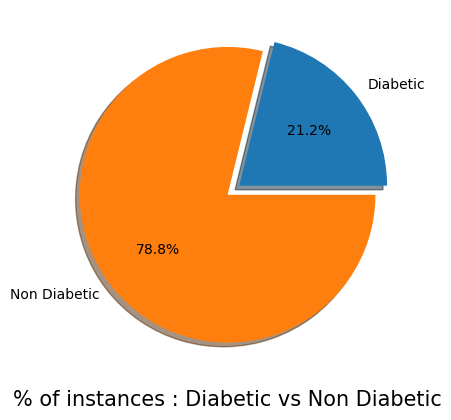

In [4]:
data_diabetes["Outcome_category"] = data_diabetes["Outcome"].apply(str).replace({"1":"Diabetic","0":"Non Diabetic"})
plt.figure()
plt.pie([i for i in data_diabetes.groupby("Outcome_category")["Outcome_category"].count()],explode = [0.1,0],labels = ["Diabetic","Non Diabetic"],autopct='%1.1f%%',shadow=True)
plt.xlabel("% of instances : Diabetic vs Non Diabetic",size= 15)

## Korelasi Antar Variabel

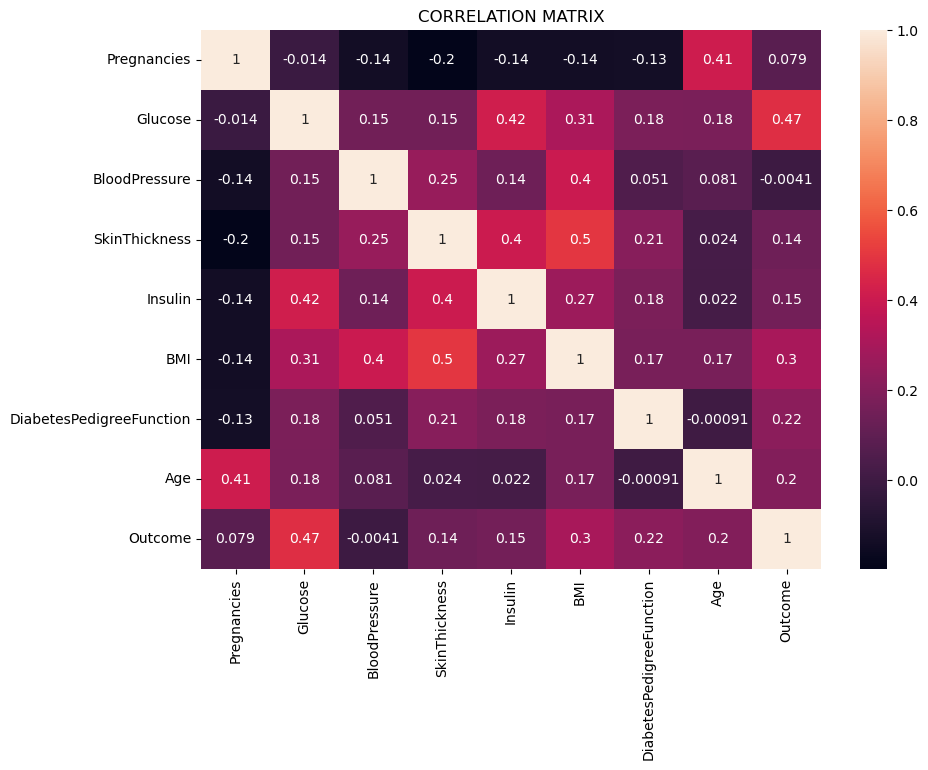

In [5]:
corr = data_diabetes.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, annot_kws={'size':10})
# Ukuran axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("CORRELATION MATRIX",pad = 6)
plt.show()

## Input and Output Data

In [6]:
y = data_diabetes.Outcome.values
x_data = data_diabetes.drop(['Outcome','Outcome_category'], axis = 1)

## Normalization (MinMaxScaler)

In [7]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
x

C:\Users\A412D\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\A412D\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.1,0.447236,0.540984,0.365079,0.138235,0.418778,0.038002,0.000000
1,0.5,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,1.000000
2,0.3,0.391960,0.409836,0.507937,0.129412,0.461997,0.072588,0.555556
3,1.0,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.888889
4,0.4,0.552764,0.754098,0.000000,0.000000,0.560358,0.048249,1.000000
...,...,...,...,...,...,...,...,...
406,0.1,0.532663,0.622951,0.000000,0.000000,0.558867,0.050811,0.555556
407,0.2,0.442211,0.475410,0.412698,0.023529,0.423249,0.293766,0.111111
408,0.2,0.613065,0.573770,0.428571,0.000000,0.548435,0.111870,0.666667
409,0.5,0.608040,0.590164,0.365079,0.164706,0.390462,0.071307,1.000000


## Splitting data for training and testing

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.20, random_state = 42)
 
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
 
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (8, 328)
x test:  (8, 83)
y train:  (328,)
y test:  (83,)


## Initialize the weights and bias

In [9]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

## Sigmoid Function

In [10]:
# z = np.dot(w.T, x_train)+b
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [11]:
def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    # x_train.shape[1]  is for scaling
    cost = (np.sum(loss)) / x_train.shape[1]     
 
    # backward propagation
    derivative_weight = (np.dot(x_train, (
        (y_head - y_train).T))) / x_train.shape[1]
    derivative_bias = np.sum(
        y_head-y_train) / x_train.shape[1]                
    gradients = {"derivative_weight": derivative_weight,
                 "derivative_bias": derivative_bias}
    return cost, gradients

## Update Parameters

In [12]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
 
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
 
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration % i: % f" %(i, cost))
 
    # update(learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation ='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

## Prediction

In [13]:
def predict(w, b, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T, x_test)+b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
 
    # if z is bigger than 0.5, our prediction is sign one (y_head = 1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head = 0),
    for i in range(z.shape[1]):
        if z[0, i]<= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
 
    return Y_prediction

## Logistic Regression

Cost after iteration  0:  0.699917
Cost after iteration  10:  0.549587
Cost after iteration  20:  0.537702
Cost after iteration  30:  0.527413
Cost after iteration  40:  0.518412
Cost after iteration  50:  0.510459
Cost after iteration  60:  0.503370
Cost after iteration  70:  0.497000
Cost after iteration  80:  0.491235
Cost after iteration  90:  0.485985


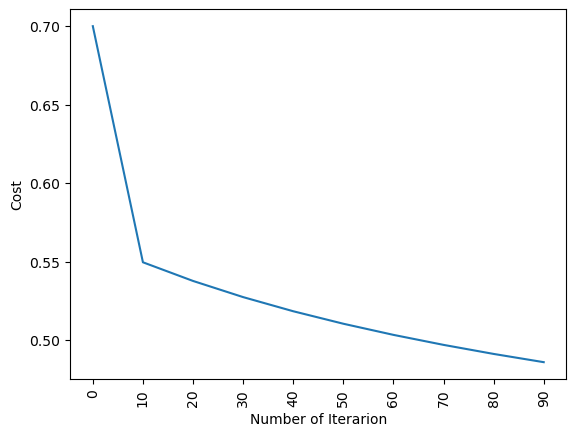

train accuracy: 77.4390243902439 %
test accuracy: 86.74698795180723 %


In [14]:
def logistic_regression(x_train, y_train, x_test, y_test,
                        learning_rate,  num_iterations):
 
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)
     
    parameters, gradients, cost_list = update(
        w, b, x_train, y_train, learning_rate, num_iterations)
     
    y_prediction_test = predict(
        parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(
        parameters["weight"], parameters["bias"], x_train)
 
    # train / test Errors
    print("train accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
     
logistic_regression(x_train, y_train, x_test,
                    y_test, learning_rate = 1, num_iterations = 100)

## Logistic Regression with Sklearn

In [15]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, random_state=42)
logreg = LogisticRegression()

In [16]:
logreg = logreg.fit(X_train, y_train)

C:\Users\A412D\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print("train accuracy: {} %".format(
    logreg.score(X_train, y_train)*100))
print("test accuracy: {} %".format(
    logreg.score(X_test, y_test)*100))

train accuracy: 80.1829268292683 %
test accuracy: 87.95180722891565 %


## Logistic Regression with Ridge Regularization with Sklearn

In [18]:
LR = LogisticRegression(penalty="l2",C = 0.05).fit(X_train,y_train)

C:\Users\A412D\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.metrics import accuracy_score

In [20]:
LR_predictions = LR.predict(X_test)

In [21]:
print("accuracy: {} %".format(
    accuracy_score(y_test,LR_predictions)*100))

accuracy: 89.1566265060241 %
